In [42]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from pathlib import Path
from cartopy import crs as ccrs
from goesutils import goes_2_roi, radiance_to_BT, cartopy_pyresample_toggle_extent, trasform_cartopy_extent
from goesutils import norm_im
import metpy
from scipy import stats

In [28]:
#Paths
DATA_RAD_FILES = Path('../')
DATA_ACM_FILES = Path('../')

#Projections
pc = ccrs.PlateCarree()
mc = ccrs.Mercator()

#ROI
extent_pc = [-109.59326, -102.40674, 8.94659, -8.94656]

In [19]:
# Set up mc extents
target_extent_mc_cartopy = trasform_cartopy_extent(extent_pc, pc, mc)
target_extent_mc_pyresample = cartopy_pyresample_toggle_extent(target_extent_mc_cartopy)

In [30]:
g17filename=list(DATA_RAD_FILES.glob('OR_ABI-L1b-RadF-M6C07_G17*.nc'))[0]
print(g17filename)

../OR_ABI-L1b-RadF-M6C07_G17_s20191030000339_e20191030009417_c20191030009441.nc


In [31]:
dataset = xr.load_dataset(g17filename)

In [32]:
roi_rads = goes_2_roi(dataset,
               target_extent_mc_pyresample,
               1001,
               401,
               mc)

Text(0.0, 1.0, 'GOES-16')

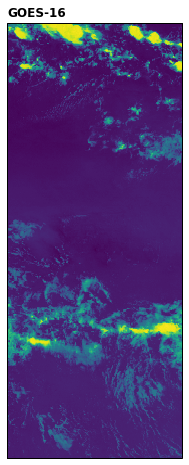

In [33]:
fig_5 = plt.figure(figsize=(15, 8))

ax_5 = fig_5.add_subplot(1, 1, 1, projection=mc)

ax_5.set_extent(target_extent_mc_cartopy, crs=mc)

# GOES16
ax_5.imshow(norm_im(roi_rads,gamma=1.0,reverse=True), origin='upper',
           extent=target_extent_mc_cartopy,
           transform=mc,
           interpolation='none')
ax_5.set_title('GOES-16', loc='left', fontweight='bold')

In [34]:
g17Maskfilename=list(DATA_ACM_FILES.glob('OR_ABI-L2-ACMF-M6_G17_s20191030000339*.nc'))[0]

In [35]:
mask_dataset = xr.load_dataset(g17Maskfilename)

In [38]:
mask_roi_rads = goes_2_roi(mask_dataset,
               target_extent_mc_pyresample,
               1001,
               401,
               mc,
               data_key='BCM')

In [37]:
mask_dataset.keys()

KeysView(<xarray.Dataset>
Dimensions:                                                     (RTM_BT_comparison_bands: 2, number_of_LZA_bounds: 2, number_of_SZA_bounds: 2, number_of_image_bounds: 2, number_of_time_bounds: 2, x: 5424, y: 5424)
Coordinates:
    t                                                           datetime64[ns] 2019-04-13T00:05:07.261080064
  * y                                                           (y) float32 0.151844 ... -0.151844
  * x                                                           (x) float32 -0.151844 ... 0.151844
    y_image                                                     float32 0.0
    x_image                                                     float32 0.0
    retrieval_local_zenith_angle                                float32 90.0
    quantitative_local_zenith_angle                             float32 70.0
    retrieval_solar_zenith_angle                                float32 180.0
    twilight_solar_zenith_angle                         

Text(0.0, 1.0, 'GOES-16')

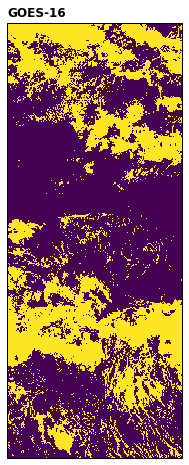

In [39]:
fig_5 = plt.figure(figsize=(15, 8))

ax_5 = fig_5.add_subplot(1, 1, 1, projection=mc)

ax_5.set_extent(target_extent_mc_cartopy, crs=mc)

# GOES16
ax_5.imshow(mask_roi_rads, origin='upper',
           extent=target_extent_mc_cartopy,
           transform=mc,
           interpolation='none')
ax_5.set_title('GOES-16', loc='left', fontweight='bold')

In [44]:
print(mask_roi_rads.max(), mask_roi_rads.min(), np.median(mask_roi_rads))

1.0 0.0 0.0


In [49]:
cloud_free_rad = roi_rads[mask_roi_rads==0].mean()

In [50]:
cloud_free_rad

0.82549375

In [51]:

planck_fk1 = float(dataset['planck_fk1'].data)
planck_fk2 = float(dataset['planck_fk2'].data) 
planck_bc1 = float(dataset['planck_bc1'].data)                       
planck_bc2 = float(dataset['planck_bc2'].data)

In [53]:
BT = radiance_to_BT(roi_rads.mean(),planck_fk1, planck_fk2, planck_bc1, planck_bc2)
print("Ave Radiance in BT:", BT)
cloud_free_BT = radiance_to_BT(cloud_free_rad, planck_fk1, planck_fk2, planck_bc1, planck_bc2)
print("Ave Cloud Free Radiance in BT: ", cloud_free_BT)

298.0861339166325
